# Convolutional Neural Networks for image classification 

In this assignment you will create your own Convolutional Neural Networks (CNN) model.  You should train the network so that it use at least 3 classes and  at most 10 classes where your dataset should have at least 1500 images per class.

> **Be aware:** Advanced neural networks are often trained on high performance (super) computers. our hardware is limited in memory and performance, and more suited for deployment of these kind of networks then for training. But this doesn't mean we can't train on it, we should only be aware that if we want better results and more complex networks you should consider more advanced hardware. 


There are several datasets available that are usable for image classification, one of them is the cifar10 dataset, which has 6000 images per class. The [Cifar10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset, classifies objects like cats, cars, airplanes, etc.

![](https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png)
<!--
![](https://www.researchgate.net/profile/Robert-Kozma/publication/329109238/figure/fig2/AS:708896771551232@1546025569617/Examples-of-CIFAR-10-images-with-10-classes-10-examples-for-each-class_Q640.jpg)
-->


The [Cifar100](https://www.cs.toronto.edu/~kriz/cifar.html) dataset
is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

Other wideley used datasets are https://www.image-net.org/ or https://cocodataset.org/


<ins>**You can use these datasets but are also allowed to find your own dataset or to even create your own custom dataset.**</ins>



Use the following website that takes you trought all the steps of development.
https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

For this assignment: 

* You should use at least 3 classes and at most 10 classes where such dataset should have at least 1500 images per class. (more images should lead to better detection performance) 


<!--
* When you follow the steps on the given website you should be aware to downscale the suggested network to be able to train, you can actually train all the 10 classes on the given Cifar dataset on the jetson with a downscaled CNN!
--> 

* Show the output of the different (training) steps and the resulting classification and answer the related questions in the subsections below





 




# Initialization

load all needed libraries and functions, 
check the previous tutorial how to correctly load keras and other modules

### Import the needed libraries for this assignment.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

print("Current Tensorflow version used is: " + tf.__version__)

Current Tensorflow version used is: 2.11.0



### Functions created for this assignment

In [2]:
def plotSample(X, y , classes):
    plt.imshow(X)
    plt.colorbar()
    plt.xlabel(classes[y])
    plt.show()
    
def plotAccuracyVsEpoch(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    
def plotLossVsEpoch(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    


### Check if a GPU is detected or if CPU must be used to train the TensorFlow model.

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')

if (len(physical_devices) > 0):
    details = tf.config.experimental.get_device_details(physical_devices[0])
    print("GPU detected!")
    print("Num GPUs:", len(physical_devices))
    print("GPU Type:", details["device_name"])
    print("Compute Capability:", details["compute_capability"])
else:
    print("No physical devices")
    print("Using CPU to train the model.")

No physical devices
Using CPU to train the model.



### Create a variable to trigger training of the model or not.
This is done because the whole notebook can be run at once. If a model is trained already, it would be time consuming to create another model.

In [4]:
TrainModel = True

# Load dataset & Plot a subset

load your dataset and show a plot of the subset of your data

> Just remember that you must use at least 3 classes and at most 10 classes, so, in the case of the cifar10, if you decide to use 5 classes, then get rid of the other 5 to save space. In other words, choose a dataset, check the images (amount, size in pixels) and implement the steps needed shown in the provided notebook. 

In [5]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train) , (x_test, y_test) = cifar10.load_data()
class_name = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]



Show the train and test shape of the dataset.


In [6]:
print("The shape of x_train is: " + str(x_train.shape))
print("The shape of y_train is: " + str(y_train.shape))
print("The shape of x_test is: " + str(x_test.shape))
print("The shape of y_test is: " + str(y_test.shape))

The shape of x_train is: (50000, 32, 32, 3)
The shape of y_train is: (50000, 1)
The shape of x_test is: (10000, 32, 32, 3)
The shape of y_test is: (10000, 1)


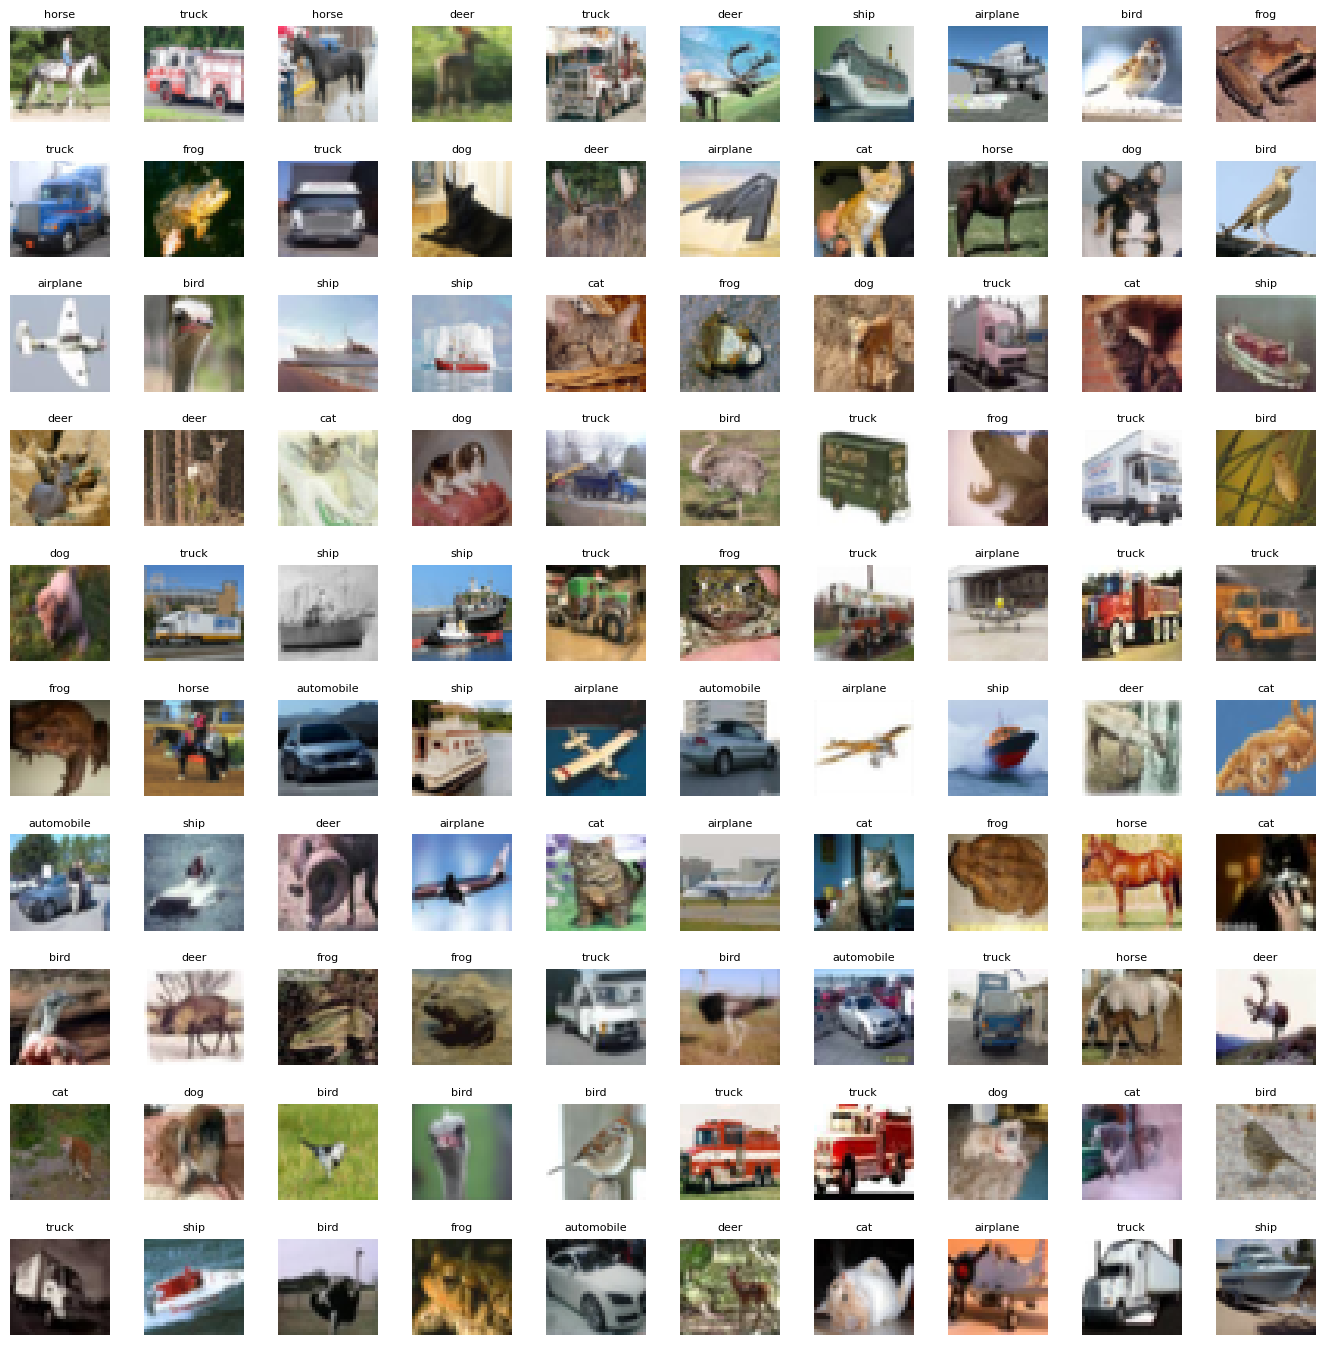

In [7]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(x_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

    plt.subplots_adjust(hspace=0.4)


In [8]:
y_train = np.reshape(y_train,(50000))
y_test = np.reshape(y_test,(10000))

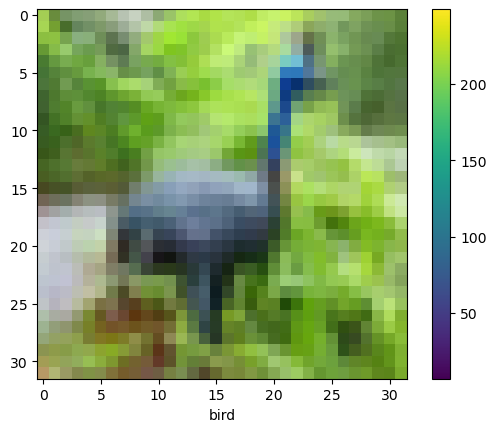

In [9]:
index = 6
plt.figure()
plt.imshow(x_train[index])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_name[y_train[index]])
plt.show()

# Prepare Pixel Data

pre-process your raw input data... rescale... normalize....

The pictures in the dataset are already in a 32x32 pixel format.
In the next steps, the x_train and x_test (Images) will be normalized by dividing them with 255.0. This results in output data ranging from 0 to 1 instead of 0 to 255. Which is easier to train for the model.


In [10]:
x_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

In [11]:
x_train = x_train / 255.0 
x_test = x_test / 255.0

In [12]:
x_train[100]

array([[[0.83529412, 0.89803922, 0.94901961],
        [0.82745098, 0.89019608, 0.94117647],
        [0.82745098, 0.89019608, 0.94117647],
        ...,
        [0.59215686, 0.68235294, 0.80784314],
        [0.59215686, 0.68235294, 0.80784314],
        [0.58431373, 0.6745098 , 0.8       ]],

       [[0.83921569, 0.89803922, 0.94509804],
        [0.83137255, 0.89019608, 0.9372549 ],
        [0.83137255, 0.89019608, 0.9372549 ],
        ...,
        [0.59607843, 0.68627451, 0.81176471],
        [0.59607843, 0.68627451, 0.81176471],
        [0.59215686, 0.68235294, 0.80392157]],

       [[0.84705882, 0.89803922, 0.9372549 ],
        [0.83921569, 0.89019608, 0.92941176],
        [0.83529412, 0.89019608, 0.92941176],
        ...,
        [0.6       , 0.69019608, 0.80784314],
        [0.6       , 0.69019608, 0.80784314],
        [0.59215686, 0.68235294, 0.8       ]],

       ...,

       [[0.56862745, 0.62352941, 0.64705882],
        [0.53333333, 0.58039216, 0.60392157],
        [0.56078431, 0

In [13]:
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

## Define your Model

This is the crucial part of the assignment! 

We do not expect that you can/should develop your own network model, so you can take the suggested model as decribed on [the given website](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/).....but 


**NOTE:**

If you run into memory and processing limitations you can reduce the amount of convolutions and dense layers, you can reduce the amount of classes, you can reduce the amount of input images, or the input images size. With a scaled down network the accuracy will be lower then with a more complex network. 


* How is your model constructed, how many trainable parameters does it have, and where are they located?

In [14]:
model = tf.keras.models.Sequential()

# Convolutional Layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
# Pooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
# model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

# Fit the Model

Fitting the model is the time consuming part, this depend on the complexity of the model and the amount of training data.
In the fitting process the model is first build up in memory with all the tunable parameters and intercomnnects (with random start values). This is also the limitation of some systems, all these parameters are stored in memory (or when not fitting in a swap file)

**TIP:** do not start the first time with training a lot of epochs, first see if this and all following steps in your system work and when you are sure that all works train your final model. 

* Which batch size and how many epochs give a good result?

In [15]:
if TrainModel == True:
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', patience=5,  restore_best_weights=True)

    reduce_learningrate = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

    callbacks_list = [es, reduce_learningrate]
    
    history = model.fit(x_train, y_train_onehot, epochs=50, batch_size=2, validation_data=(x_test, y_test_onehot), callbacks=callbacks_list)

Epoch 1/50
25000/25000 [==============================] - 243s 10ms/step - loss: 1.9343 - accuracy: 0.2550 - precision: 0.5511 - recall: 0.0572 - val_loss: 1.5524 - val_accuracy: 0.4268 - val_precision: 0.6383 - val_recall: 0.1260 - lr: 0.0010
Epoch 2/50
25000/25000 [==============================] - 225s 9ms/step - loss: 1.3653 - accuracy: 0.5088 - precision: 0.7060 - recall: 0.3280 - val_loss: 1.0179 - val_accuracy: 0.6418 - val_precision: 0.7767 - val_recall: 0.5120 - lr: 0.0010
Epoch 3/50
25000/25000 [==============================] - 222s 9ms/step - loss: 1.0748 - accuracy: 0.6263 - precision: 0.7668 - recall: 0.4927 - val_loss: 0.9414 - val_accuracy: 0.6652 - val_precision: 0.7909 - val_recall: 0.5471 - lr: 0.0010
Epoch 4/50
25000/25000 [==============================] - 223s 9ms/step - loss: 0.9671 - accuracy: 0.6688 - precision: 0.7910 - recall: 0.5526 - val_loss: 0.8327 - val_accuracy: 0.7144 - val_precision: 0.8309 - val_recall: 0.5980 - lr: 0.0010
Epoch 5/50
25000/25000 [===

# Evaluate Model

Show the model accuracy after the training process ... 
* How accurate is your final model?

In [16]:
if TrainModel:
    val_loss, val_acc, val_precision, val_recall = model.evaluate(x_test, y_test_onehot, batch_size= 1)
    print(f"Validated loss: {val_loss} , Validated Accuracy: {val_acc}")



10000/10000 [==============================] - 19s 2ms/step - loss: 1.5524 - accuracy: 0.4268 - precision: 0.6383 - recall: 0.1260
Validated loss: 1.552431583404541 , Validated Accuracy: 0.426800012588501


# learning curves

Show the learning curves of your training sequence, of accuracy, value_accuracy and loss, value_loss

* Explain what the difference is between the therms accuracy and value_accuracy? (what do they represent)

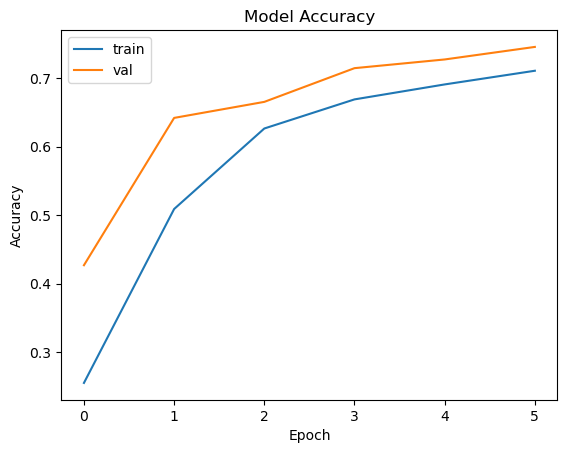

In [17]:
plotAccuracyVsEpoch(history)

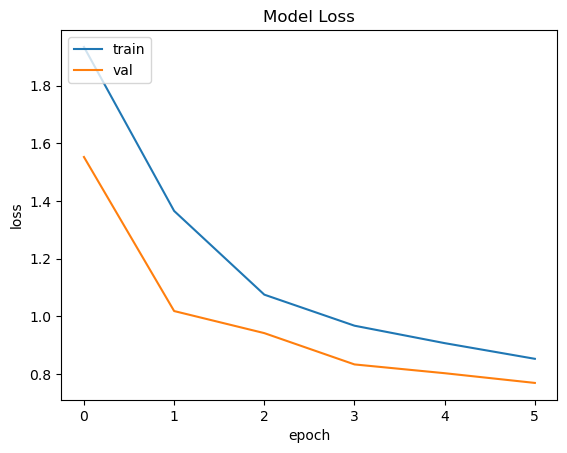

In [18]:
plotLossVsEpoch(history)

# Save model

Save the model for later usage

In [19]:
if TrainModel:
    model.save('saved_models/model'+ str("7"))

INFO:tensorflow:Assets written to: saved_models/model7\assets


INFO:tensorflow:Assets written to: saved_models/model7\assets


# Evaluate Final Model

After training and saving the model you can deploy this model on any given input image. You can start a new application in where you import this model and apply it on any given imput images, so you can just load the model and don't need the timeconsuming training anymore.

In [20]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                100*np.max(predictions_array),
                                class_name[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

  thisplot[true_label].set_color('blue')



In [54]:
test_model = tf.keras.models.load_model('./saved_models/model7')
probability_model = tf.keras.Sequential([test_model, tf.keras.layers.Softmax()])

In [55]:
import pathlib
import PIL
data_dir = pathlib.Path("./testDataset")

In [56]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

100


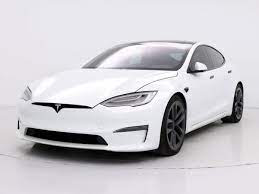

In [57]:
car = list(data_dir.glob('automobile/*'))
PIL.Image.open(str(car[3]))

In [58]:
from pathlib import Path
import imghdr

data_dir = "./testDataset"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [59]:
batch_size = 100
img_height = 32
img_width = 32


test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100 files belonging to 10 classes.


In [60]:
class_names = test_ds.class_names
print(class_names)


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


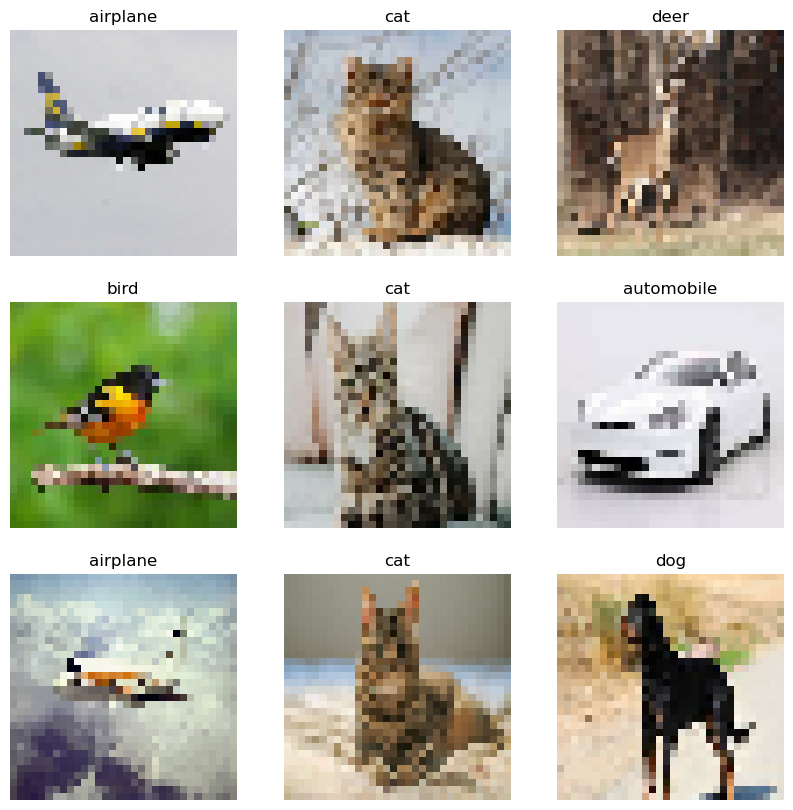

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



In [62]:
def inverseImageBW_array(originalImage):
    temp = 1 - originalImage
    temp = -1.* originalImage
    return temp

In [63]:
for image_batch, labels_batch in test_ds:
    x_validation = image_batch
    y_validation = labels_batch

y_validation_onehot = tf.keras.utils.to_categorical(y_validation)

x_validation = np.array(x_validation)/ 255.0
y_validation = np.array(y_validation)

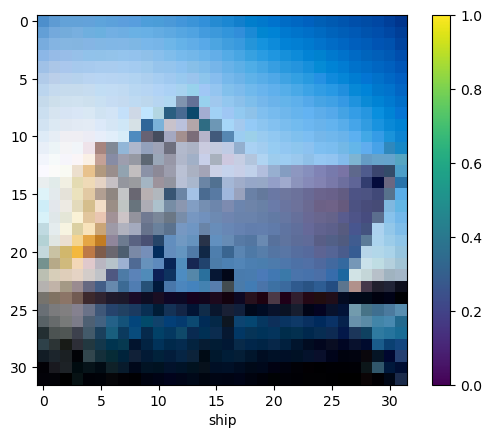

In [64]:
index = 8

plt.figure()
plt.imshow(x_validation[index])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_validation[index]])
plt.show()

## Make Prediction

We can use our saved model to make a prediction on new images that are not trained on... make sure the input images receive the same pre-processing as the images you trained on.

So fetch some images from the internet (similar classes, but not from your dataset), prepare them to fit your network and classify them. Do this for  **10 images per class** and show the results!

* How good is the detection on you real dataset? (show some statistics) 

In [65]:
predictSource = x_validation
realLabels = y_validation

predictions = probability_model.predict_on_batch(predictSource)
predictionLabels = np.argmax(predictions, axis=1)



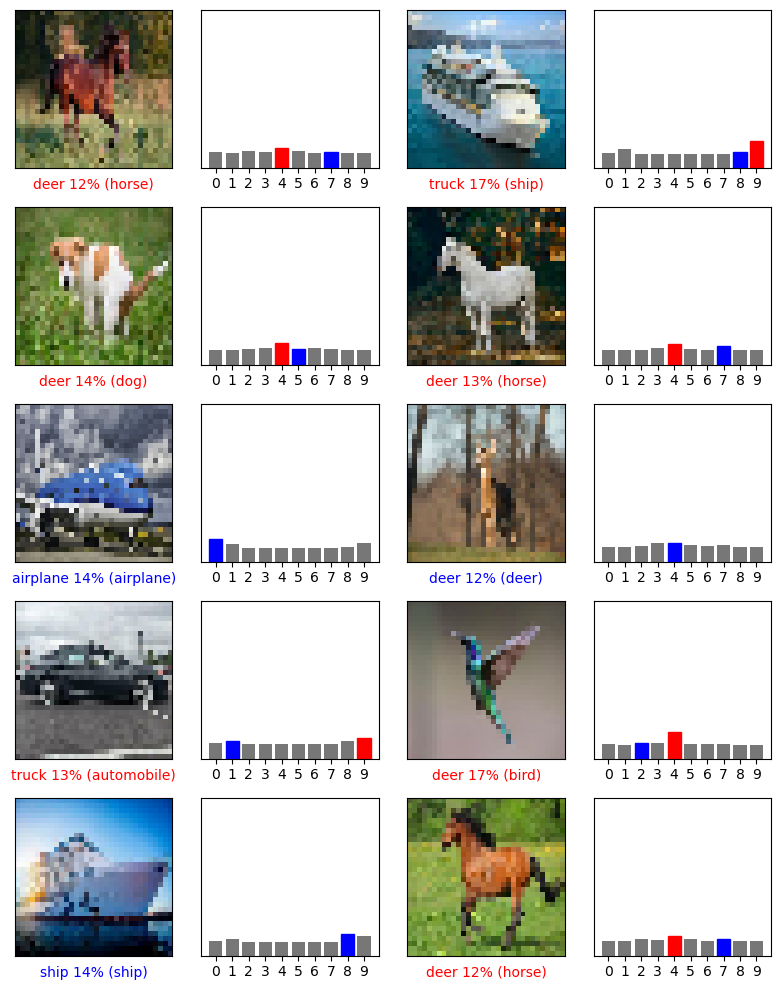

In [51]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], realLabels, predictSource)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], realLabels)
plt.tight_layout()
plt.show()



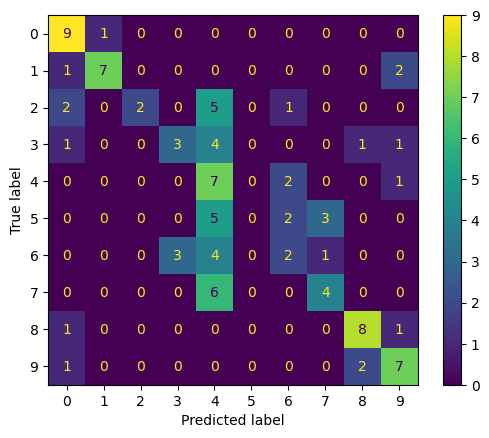

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(realLabels, predictionLabels)
ConfusionMatrixDisplay(cm).plot()

In [50]:
val_loss, val_acc, val_prec, val_rec = test_model.evaluate(x_validation, y_validation_onehot, batch_size= 1)
print(f"Validated loss: {val_loss} , Validated Accuracy: {val_acc}")



100/100 [==============================] - 0s 2ms/step - loss: 1.5279 - accuracy: 0.4900 - precision: 0.8182 - recall: 0.1800      
Validated loss: 1.5279372930526733 , Validated Accuracy: 0.49000000953674316
